# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

## Reading the Data & EDA

In [2]:
df_train = pd.read_csv ("C:/Users/ADMIN/Documents/Zindi Air pollution/Train.csv")

In [3]:
df_test=pd.read_csv("C:/Users/ADMIN/Documents/Zindi Air pollution/Test.csv")

In [4]:
df_train.shape

(30557, 82)

In [5]:
df_test.shape

(16136, 77)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [7]:
#counting null values
null_counts_train= df_train.isnull().sum() 
#converting null counts to a data frame
null_counts_train_df = pd.DataFrame(null_counts_train, columns=['Null Counts'])\
#Printing the null counts
null_counts_train_df

,Null Counts
Place_ID X Date,0
Date,0
Place_ID,0
target,0
target_min,0
...,...
L3_CH4_aerosol_optical_depth,24765
L3_CH4_sensor_azimuth_angle,24765
L3_CH4_sensor_zenith_angle,24765
L3_CH4_solar_azimuth_angle,24765


In [8]:
# Calculate the percentage of null values in each column
null_percentage_train = (df_train.isnull().sum() / len(df_train)) * 100

# Convert the result to a DataFrame
null_percentage_train_df = pd.DataFrame(null_percentage_train, columns=['Null Percentage'])

# Print the DataFrame
print("Null value percentage in each column:")
print(null_percentage_train_df)

Null value percentage in each column:
                              Null Percentage
Place_ID X Date                       0.00000
Date                                  0.00000
Place_ID                              0.00000
target                                0.00000
target_min                            0.00000
...                                       ...
L3_CH4_aerosol_optical_depth         81.04526
L3_CH4_sensor_azimuth_angle          81.04526
L3_CH4_sensor_zenith_angle           81.04526
L3_CH4_solar_azimuth_angle           81.04526
L3_CH4_solar_zenith_angle            81.04526

[82 rows x 1 columns]


In [9]:
# Drop columns with missing values exceeding 10%
columns_to_drop_train = null_percentage_train[null_percentage_train > 10].index
df_train = df_train.drop(columns=columns_to_drop_train)

In [10]:
# Get numerical columns
numerical_columns_train = df_train.select_dtypes(include=['number']).columns

# Replace null values in numerical columns with median
for column in numerical_columns_train:
    median_value = df_train[column].median()
    df_train[column] = df_train[column].fillna(median_value)

# Print the DataFrame with null values replaced by mean
print("DataFrame with null values replaced by mean:")
print(df_train)

DataFrame with null values replaced by mean:
            Place_ID X Date        Date Place_ID  target  target_min  \
0      010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0   
1      010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0   
2      010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0   
3      010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0   
4      010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0   
...                     ...         ...      ...     ...         ...   
30552  YWSFY6Q X 2020-03-15  2020-03-15  YWSFY6Q    22.0        14.0   
30553  YWSFY6Q X 2020-03-16  2020-03-16  YWSFY6Q    53.0        30.0   
30554  YWSFY6Q X 2020-03-17  2020-03-17  YWSFY6Q    85.0        52.0   
30555  YWSFY6Q X 2020-03-18  2020-03-18  YWSFY6Q   103.0        33.0   
30556  YWSFY6Q X 2020-03-19  2020-03-19  YWSFY6Q    89.0        46.0   

       target_max  target_variance  target_count  \
0            53.0           769.50    

In [11]:
# Convert specified columns to float
columns_to_convert = ['Place_ID X Date', 'Date', 'Place_ID']  # Specify columns to convert to float
df_train[columns_to_convert] = df_train[columns_to_convert].astype(float, errors='ignore')

# Print the DataFrame with specified columns converted to float
print("DataFrame with specified columns converted to float:")
print(df_train)

DataFrame with specified columns converted to float:
            Place_ID X Date        Date Place_ID  target  target_min  \
0      010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0   
1      010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0   
2      010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0   
3      010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0   
4      010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0   
...                     ...         ...      ...     ...         ...   
30552  YWSFY6Q X 2020-03-15  2020-03-15  YWSFY6Q    22.0        14.0   
30553  YWSFY6Q X 2020-03-16  2020-03-16  YWSFY6Q    53.0        30.0   
30554  YWSFY6Q X 2020-03-17  2020-03-17  YWSFY6Q    85.0        52.0   
30555  YWSFY6Q X 2020-03-18  2020-03-18  YWSFY6Q   103.0        33.0   
30556  YWSFY6Q X 2020-03-19  2020-03-19  YWSFY6Q    89.0        46.0   

       target_max  target_variance  target_count  \
0            53.0           76

In [12]:
df_train.isnull().sum() 

Place_ID X Date                                   0
Date                                              0
Place_ID                                          0
target                                            0
target_min                                        0
target_max                                        0
target_variance                                   0
target_count                                      0
precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_senso

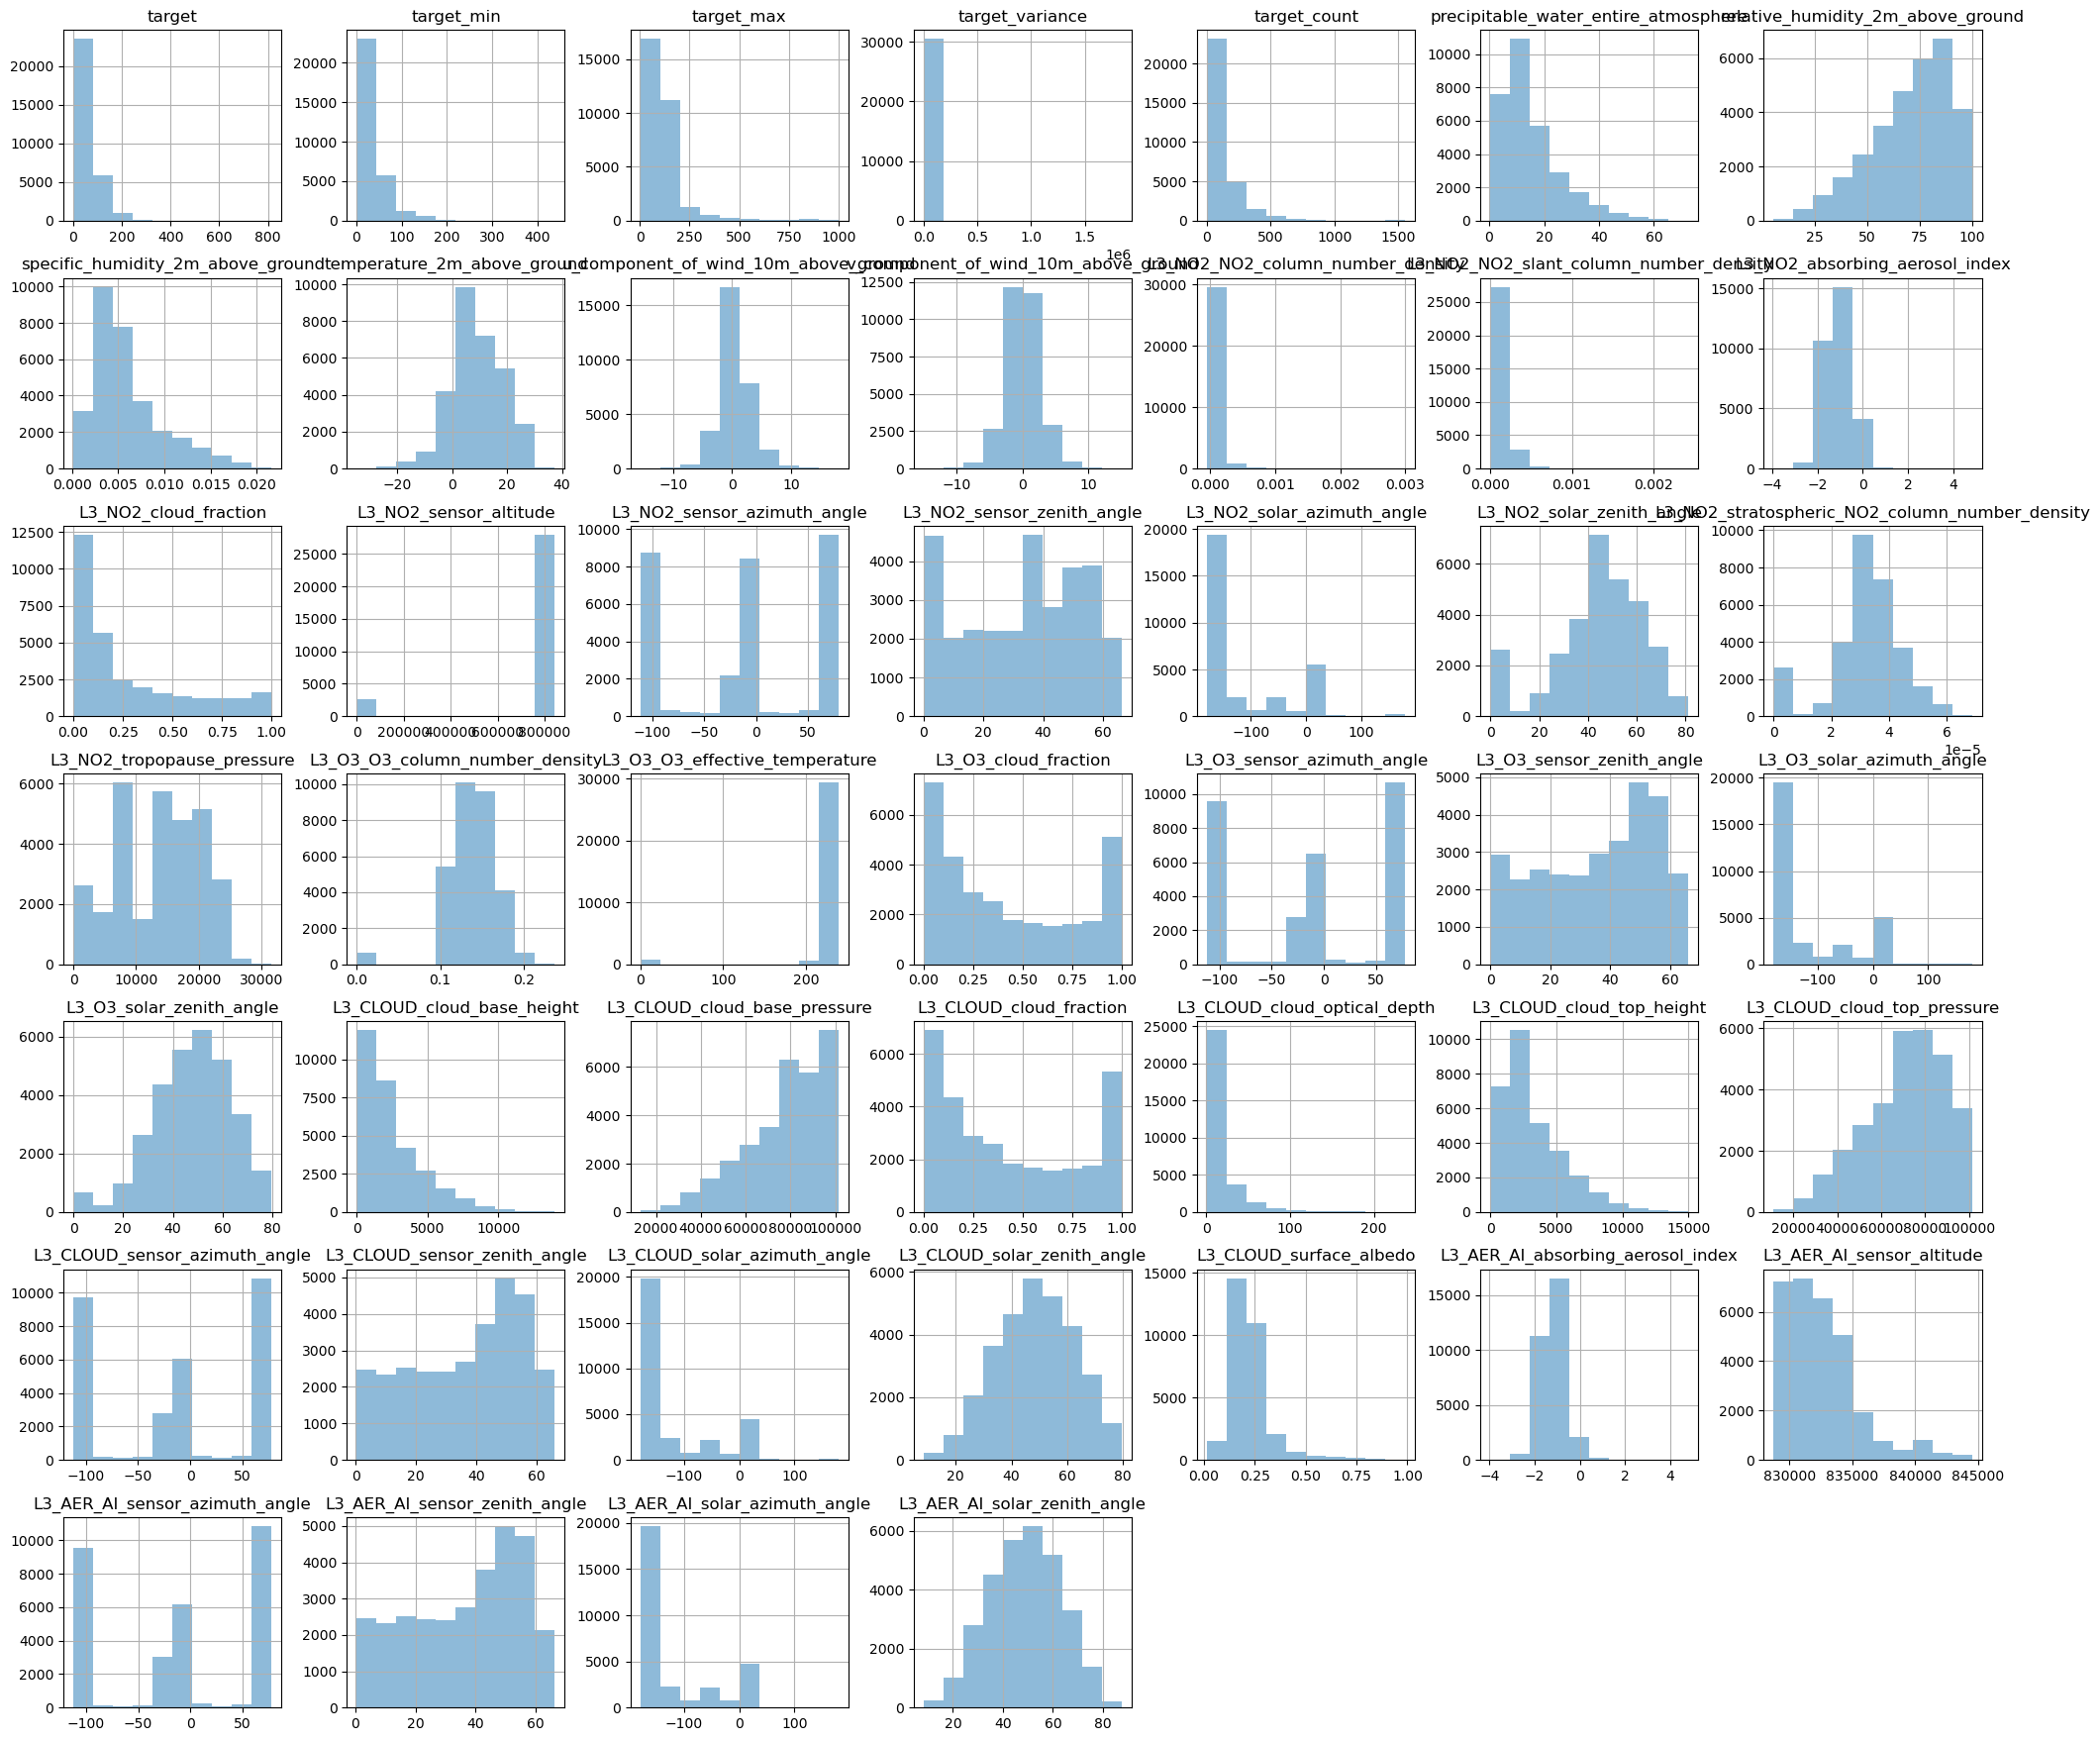

In [13]:
#histogram of the data
df_train.select_dtypes(include=['number']).hist(alpha=0.5, figsize=(25, 22))
plt.show()

In [14]:
#checking the correlation on a heatmap
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                                  target  target_min  \
target                                          1.000000    0.818803   
target_min                                      0.818803    1.000000   
target_max                                      0.630801    0.421529   
target_variance                                 0.184818    0.047010   
target_count                                    0.094135   -0.065336   
precipitable_water_entire_atmosphere           -0.031329   -0.031739   
relative_humidity_2m_above_ground              -0.084835   -0.032409   
specific_humidity_2m_above_ground              -0.035670   -0.023465   
temperature_2m_above_ground                    -0.038818   -0.032910   
u_component_of_wind_10m_above_ground           -0.148202   -0.127322   
v_component_of_wind_10m_above_ground           -0.055100   -0.035046   
L3_NO2_NO2_column_number_density                0.297070    0.199301   
L3_NO2_NO2_slant_column_number_density      

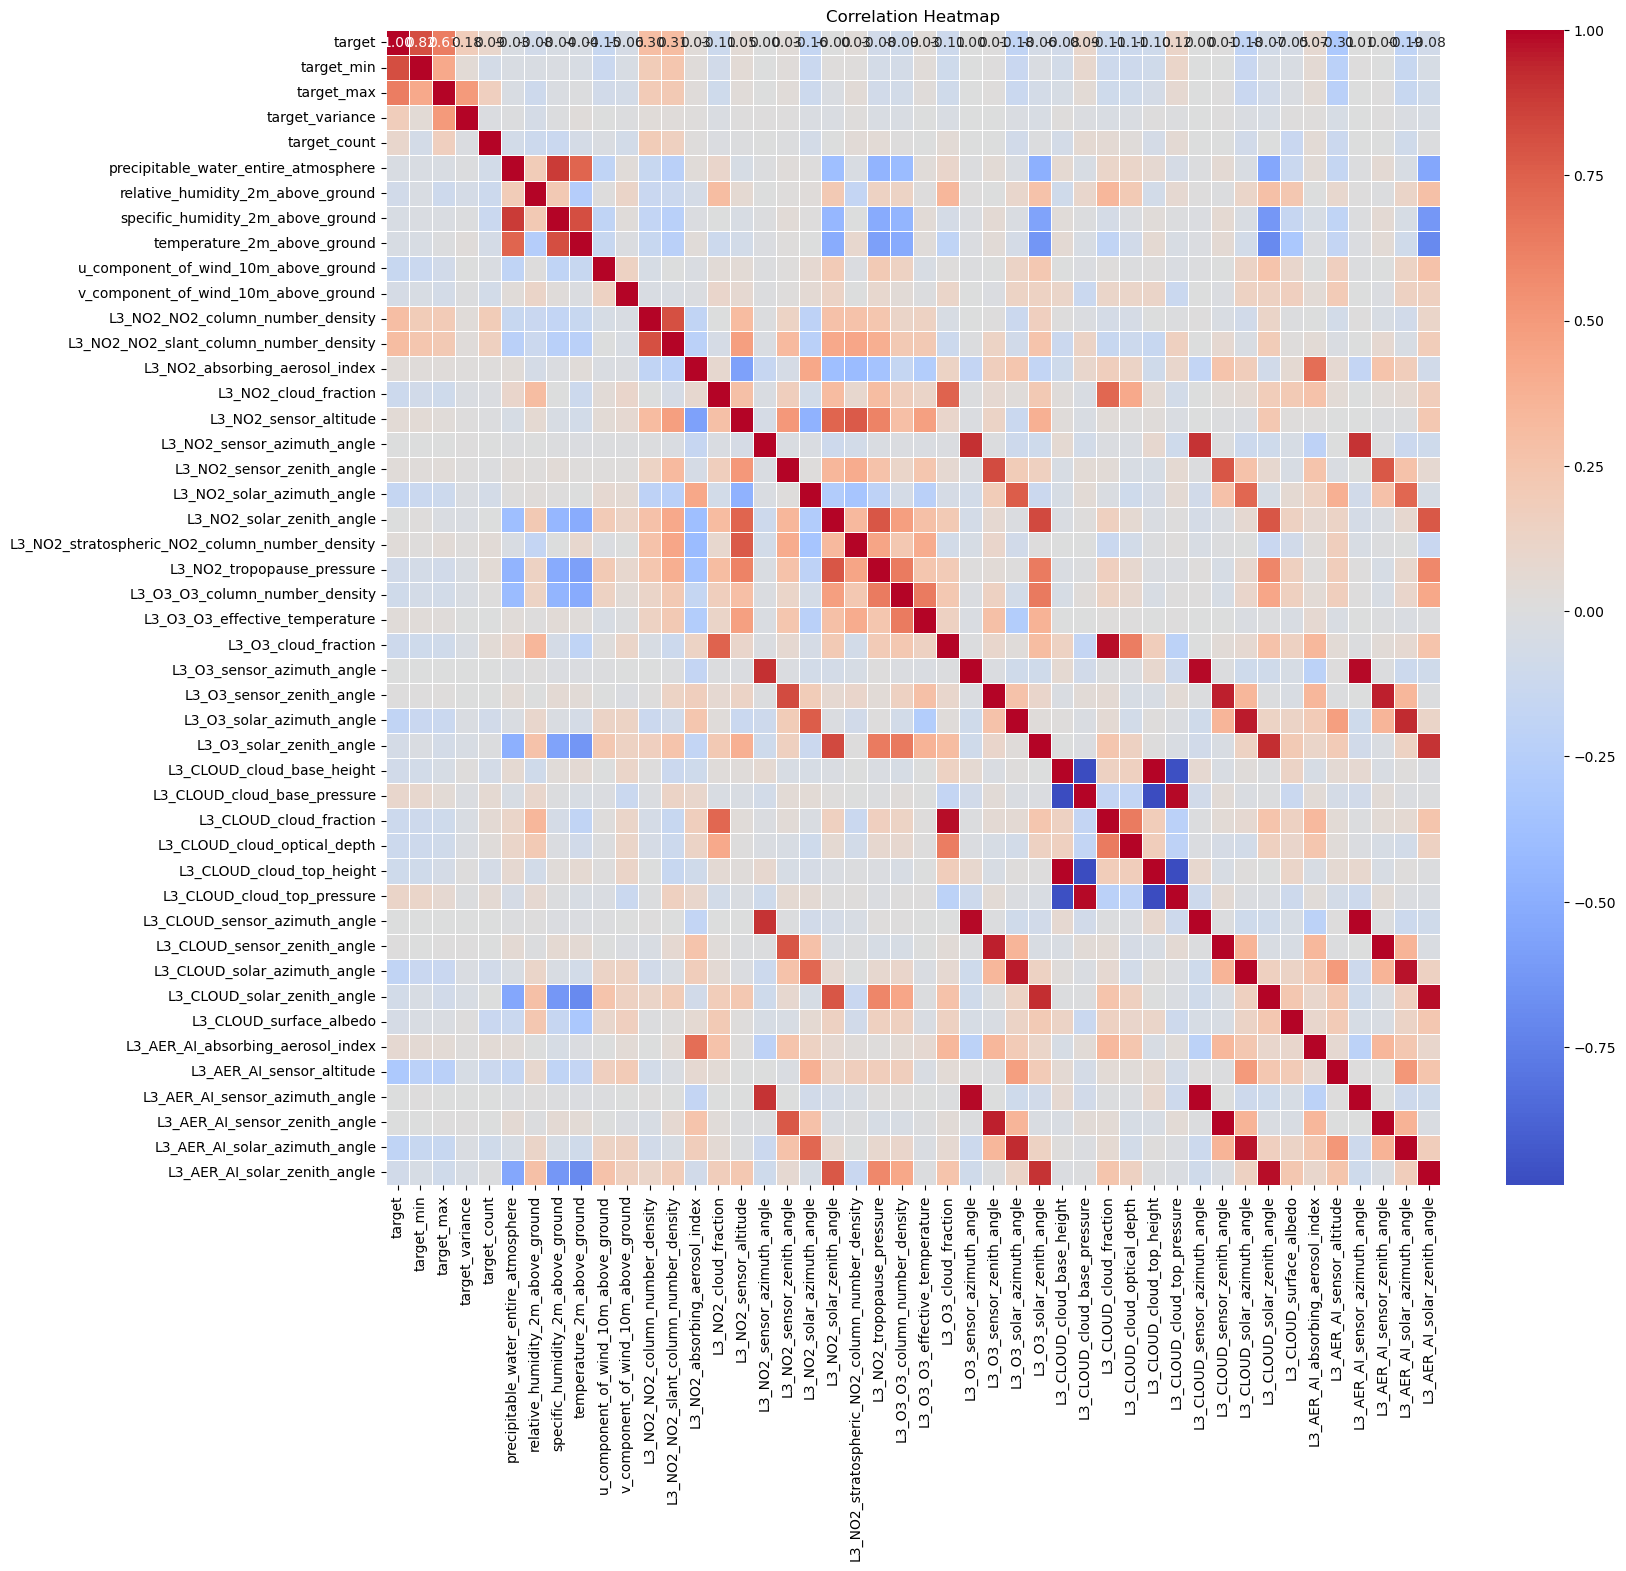

In [15]:
# Plot heatmap
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Extract the correlation values with the target variable
correlation_with_target = correlation_matrix["target"]

# Sort the correlation values in descending order to identify features with high correlation
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

print("Features and their correaltion values with the target variable:\n")
print(sorted_correlation)

Features and their correaltion values with the target variable:

target                                            1.000000
target_min                                        0.818803
target_max                                        0.630801
L3_AER_AI_sensor_altitude                         0.307466
L3_NO2_NO2_slant_column_number_density            0.305025
L3_NO2_NO2_column_number_density                  0.297070
L3_AER_AI_solar_azimuth_angle                     0.192313
target_variance                                   0.184818
L3_CLOUD_solar_azimuth_angle                      0.183539
L3_O3_solar_azimuth_angle                         0.181033
L3_NO2_solar_azimuth_angle                        0.162761
u_component_of_wind_10m_above_ground              0.148202
L3_CLOUD_cloud_top_pressure                       0.120200
L3_NO2_cloud_fraction                             0.113775
L3_CLOUD_cloud_optical_depth                      0.112303
L3_CLOUD_cloud_fraction                           

In [17]:
def correlated_features_pairs(dataset, threshold):
    correlated_pairs = []
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                feature1 = correlation_matrix.columns[i]
                feature2 = correlation_matrix.columns[j]
                correlated_pairs.append((feature1, feature2))
    return correlated_pairs

correlation_threshold = 0.9
correlated_pairs = correlated_features_pairs(df_train.select_dtypes(include=['number']), correlation_threshold)

print("Total", len(correlated_pairs), "correlated pairs found")
print("")
for pair in correlated_pairs:
    print(f"Correlated Pair: {pair[0]} and {pair[1]}")


Total 22 correlated pairs found

Correlated Pair: L3_O3_sensor_azimuth_angle and L3_NO2_sensor_azimuth_angle
Correlated Pair: L3_CLOUD_cloud_base_pressure and L3_CLOUD_cloud_base_height
Correlated Pair: L3_CLOUD_cloud_fraction and L3_O3_cloud_fraction
Correlated Pair: L3_CLOUD_cloud_top_height and L3_CLOUD_cloud_base_height
Correlated Pair: L3_CLOUD_cloud_top_height and L3_CLOUD_cloud_base_pressure
Correlated Pair: L3_CLOUD_cloud_top_pressure and L3_CLOUD_cloud_base_height
Correlated Pair: L3_CLOUD_cloud_top_pressure and L3_CLOUD_cloud_base_pressure
Correlated Pair: L3_CLOUD_cloud_top_pressure and L3_CLOUD_cloud_top_height
Correlated Pair: L3_CLOUD_sensor_azimuth_angle and L3_NO2_sensor_azimuth_angle
Correlated Pair: L3_CLOUD_sensor_azimuth_angle and L3_O3_sensor_azimuth_angle
Correlated Pair: L3_CLOUD_sensor_zenith_angle and L3_O3_sensor_zenith_angle
Correlated Pair: L3_CLOUD_solar_azimuth_angle and L3_O3_solar_azimuth_angle
Correlated Pair: L3_CLOUD_solar_zenith_angle and L3_O3_solar

In [18]:
def correlation_detection(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [19]:
correlated_features= correlation_detection(df_train.select_dtypes(include=['number']),0.9)
len(set(correlated_features))

13

In [20]:
#counting null values
null_counts_test= df_test.isnull().sum() 
#converting null counts to a data frame
null_counts_test_df = pd.DataFrame(null_counts_test, columns=['Null Counts'])\
#Printing the null counts
null_counts_test_df

,Null Counts
Place_ID X Date,0
Date,0
Place_ID,0
precipitable_water_entire_atmosphere,0
relative_humidity_2m_above_ground,0
...,...
L3_CH4_aerosol_optical_depth,13021
L3_CH4_sensor_azimuth_angle,13021
L3_CH4_sensor_zenith_angle,13021
L3_CH4_solar_azimuth_angle,13021


In [21]:
# Calculate the percentage of null values in each column
null_percentage_test = (df_test.isnull().sum() / len(df_test)) * 100

# Convert the result to a DataFrame
null_percentage_test_df = pd.DataFrame(null_percentage_test, columns=['Null Percentage'])

# Print the DataFrame
print("Null value percentage in each column:")
print(null_percentage_test_df)

Null value percentage in each column:
                                      Null Percentage
Place_ID X Date                               0.00000
Date                                          0.00000
Place_ID                                      0.00000
precipitable_water_entire_atmosphere          0.00000
relative_humidity_2m_above_ground             0.00000
...                                               ...
L3_CH4_aerosol_optical_depth                 80.69534
L3_CH4_sensor_azimuth_angle                  80.69534
L3_CH4_sensor_zenith_angle                   80.69534
L3_CH4_solar_azimuth_angle                   80.69534
L3_CH4_solar_zenith_angle                    80.69534

[77 rows x 1 columns]


In [22]:
df_test.isnull().sum() 

Place_ID X Date                             0
Date                                        0
Place_ID                                    0
precipitable_water_entire_atmosphere        0
relative_humidity_2m_above_ground           0
                                        ...  
L3_CH4_aerosol_optical_depth            13021
L3_CH4_sensor_azimuth_angle             13021
L3_CH4_sensor_zenith_angle              13021
L3_CH4_solar_azimuth_angle              13021
L3_CH4_solar_zenith_angle               13021
Length: 77, dtype: int64

In [23]:
# Drop columns with missing values exceeding 10%
columns_to_drop_test = null_percentage_test[null_percentage_test > 10].index
df_test = df_test.drop(columns=columns_to_drop_test)

In [24]:
# Get numerical columns
numerical_columns_test = df_test.select_dtypes(include=['number']).columns

# Replace null values in numerical columns with median
for column in numerical_columns_test:
    median_value = df_test[column].median()
    df_test[column] = df_test[column].fillna(median_value)

# Print the DataFrame with null values replaced by median
print("DataFrame with null values replaced by median:")
print(df_test)

DataFrame with null values replaced by median:
            Place_ID X Date        Date Place_ID  \
0      0OS9LVX X 2020-01-02  2020-01-02  0OS9LVX   
1      0OS9LVX X 2020-01-03  2020-01-03  0OS9LVX   
2      0OS9LVX X 2020-01-04  2020-01-04  0OS9LVX   
3      0OS9LVX X 2020-01-05  2020-01-05  0OS9LVX   
4      0OS9LVX X 2020-01-06  2020-01-06  0OS9LVX   
...                     ...         ...      ...   
16131  ZZDJZMS X 2020-03-31  2020-03-31  ZZDJZMS   
16132  ZZDJZMS X 2020-04-01  2020-04-01  ZZDJZMS   
16133  ZZDJZMS X 2020-04-02  2020-04-02  ZZDJZMS   
16134  ZZDJZMS X 2020-04-03  2020-04-03  ZZDJZMS   
16135  ZZDJZMS X 2020-04-04  2020-04-04  ZZDJZMS   

       precipitable_water_entire_atmosphere  \
0                                 11.600000   
1                                 18.300001   
2                                 17.600000   
3                                 15.011948   
4                                  9.700000   
...                                     ...   

In [25]:
df_test.isnull().sum() 

Place_ID X Date                                   0
Date                                              0
Place_ID                                          0
precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_sensor_azimuth_angle                       0
L3_NO2_sensor_zenith_angle                        0
L3_NO2_solar_azimuth_angle                        0
L3_NO2_solar_zenith_angle                         0
L3_NO2_stratospheric_NO2_column_number_density    0
L3_NO2_tropo

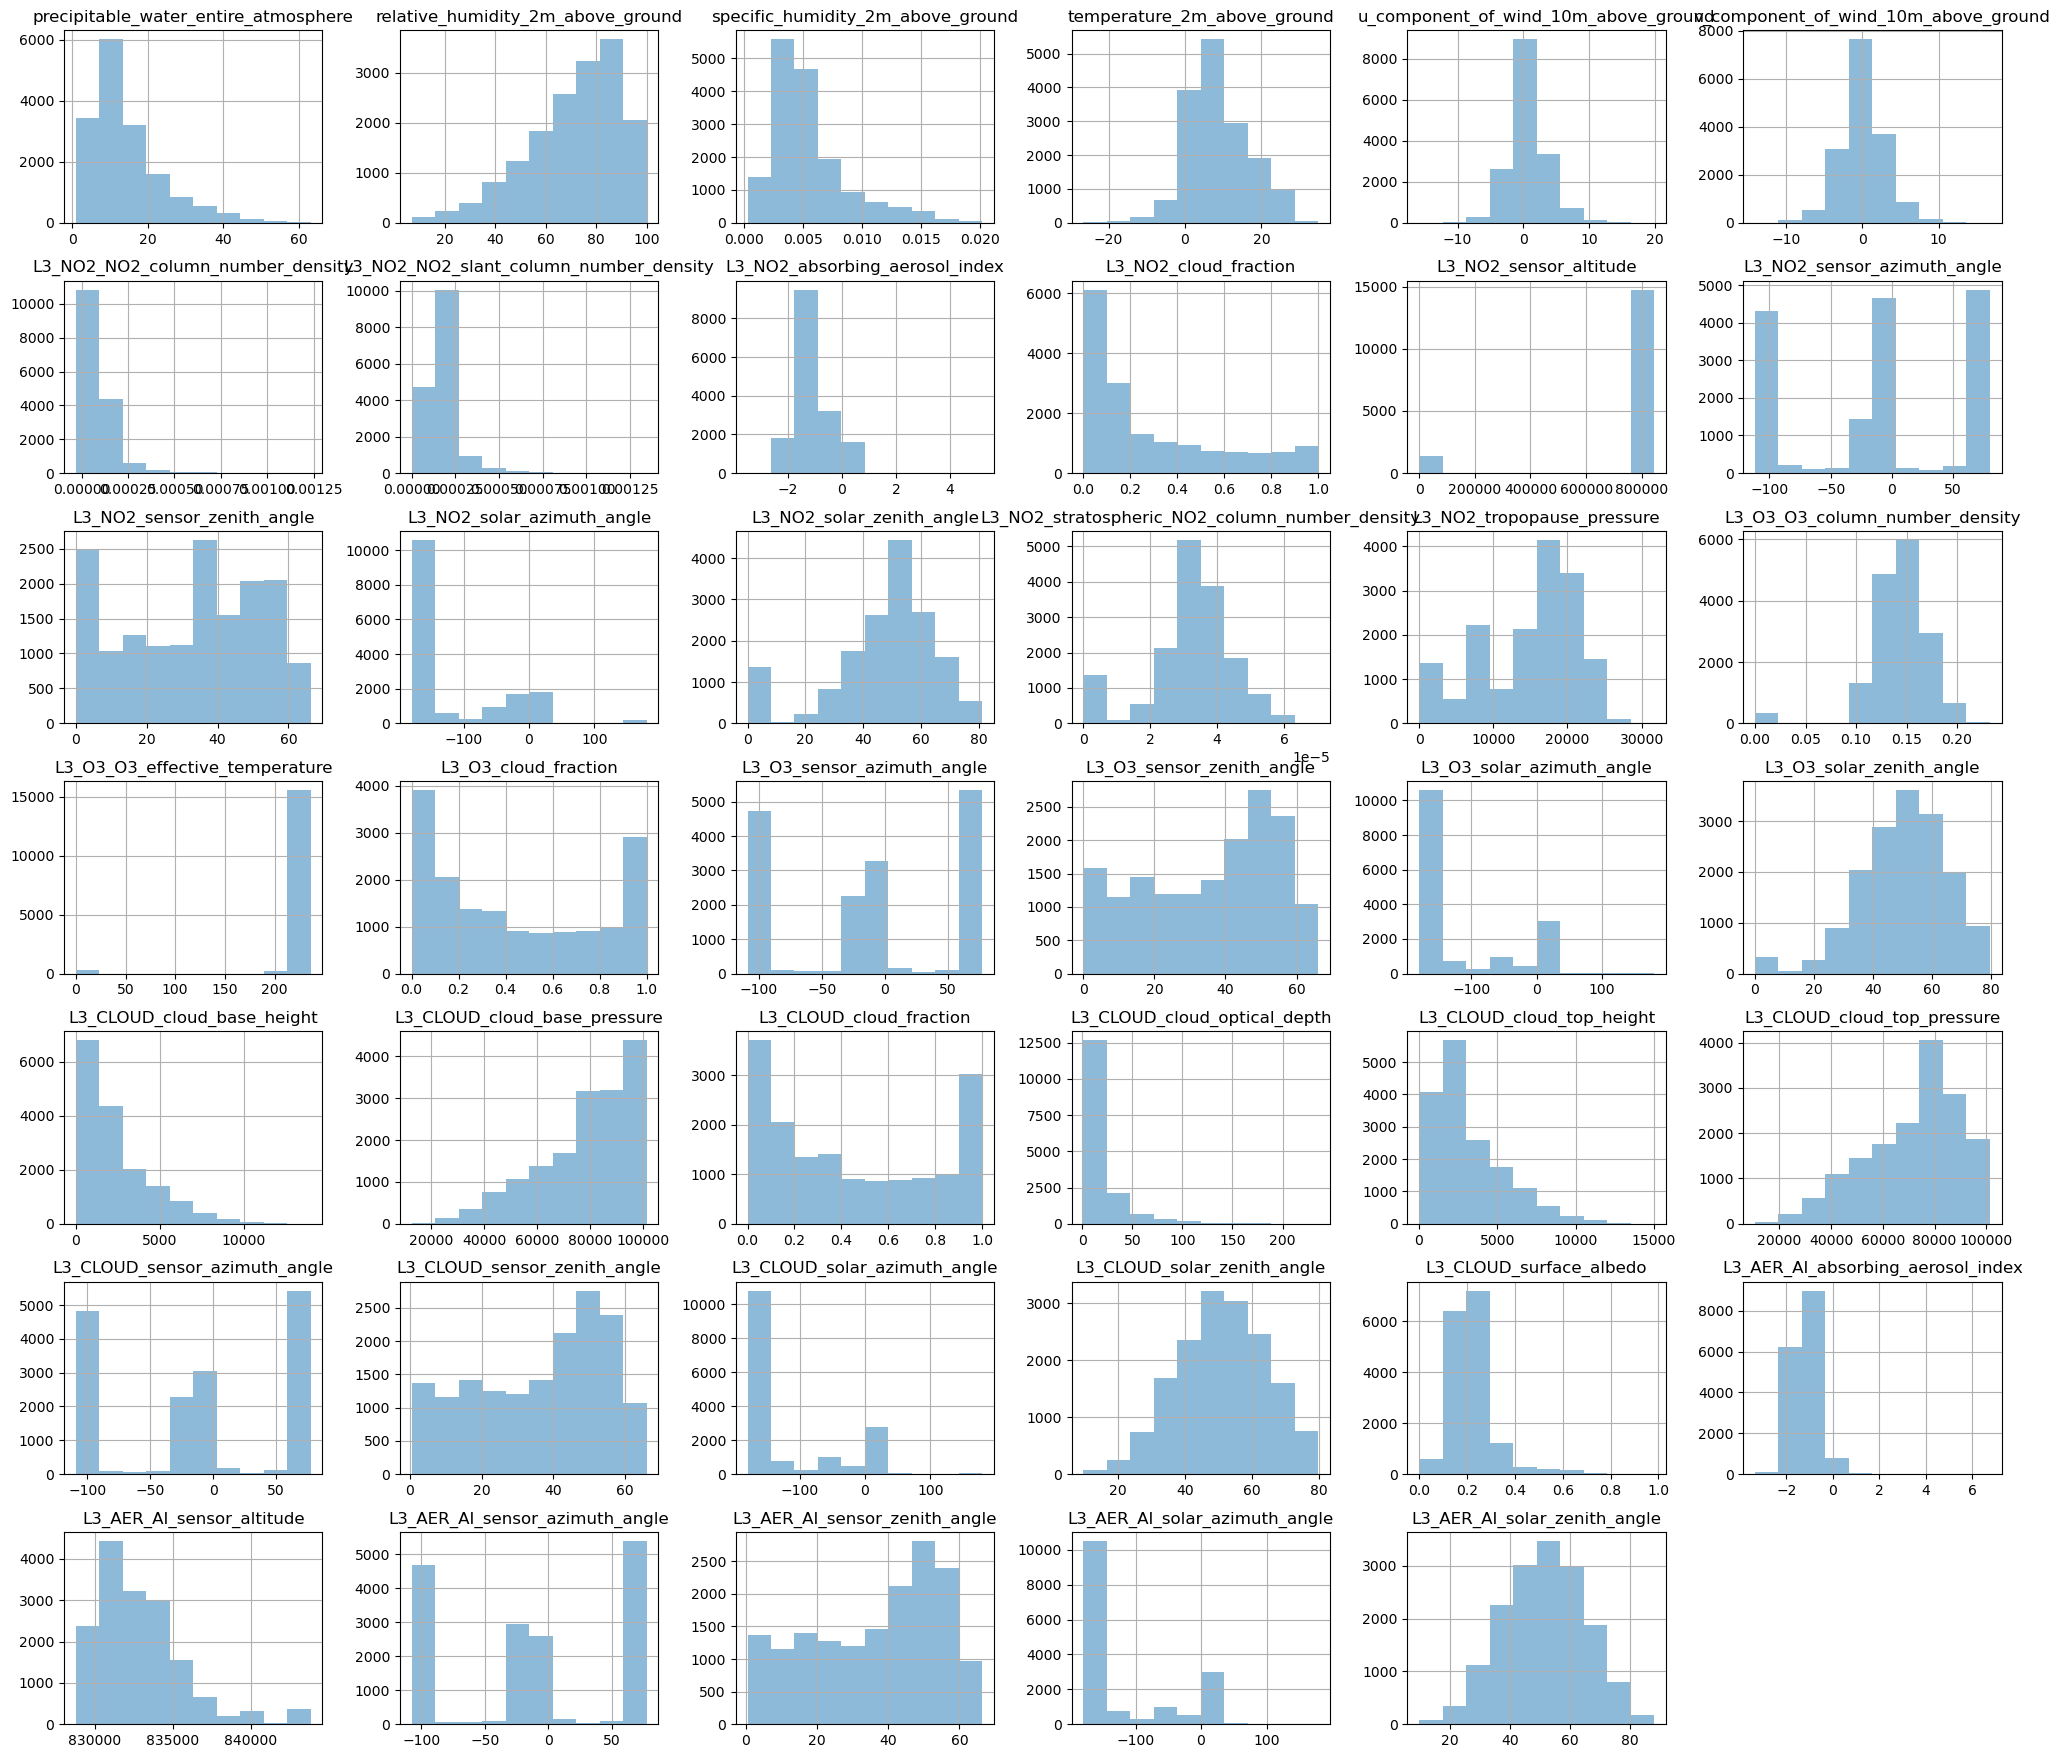

In [26]:
#histogram of the data
df_test.select_dtypes(include=['number']).hist(alpha=0.5, figsize=(25, 22))
plt.show()

In [27]:
#Dropping irrelevant features and multicolinear columns not needed for training model

drop_columns = ['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min', 
                'target_max', 'target_variance', 'target_count', 
                'L3_CLOUD_solar_zenith_angle', 'L3_O3_sensor_azimuth_angle',
                'L3_O3_cloud_fraction', 'L3_CLOUD_cloud_top_height',
                'L3_CLOUD_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle',
                'L3_CLOUD_sensor_zenith_angle', 'L3_NO2_sensor_azimuth_angle',
                'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_base_height',
                'L3_O3_solar_zenith_angle', 'L3_O3_solar_azimuth_angle', 'L3_CLOUD_solar_azimuth_angle']


In [28]:
X = df_train.drop(drop_columns, axis=1)
y = df_train['target']

In [29]:
X.shape

(30557, 28)

In [30]:
#Saving the features to be used to train the model
features_used_for_training = list(X.columns)
features_used_for_training

['precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_sensor_zenith_angle',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_cloud_optical_depth',
 'L3_CLOUD_cloud_top_pressure',
 'L3_CLOUD_surface_albedo',
 'L3_AER_AI_absorbing_aerosol_index',
 'L3_AER_AI_sensor_altitude',
 'L3_AER_AI_sensor_azimuth_angle',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_AER_AI_solar_zenith_angle']

In [31]:
#inititialize scaler form sklearn
scaler = StandardScaler()

In [32]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_O3_sensor_zenith_angle,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle
0,-0.402523,-0.550456,0.537511,0.984205,0.583280,-0.498085,-0.210198,-0.063377,-0.224159,-0.895542,...,0.150003,-1.239109,-0.395043,0.172582,-0.160632,-0.130448,2.625993,1.242700,0.837440,-1.852177
1,-0.065709,-1.156595,0.629929,1.415508,1.075924,-0.483214,-0.185871,0.328975,0.028447,-0.855072,...,1.264707,-1.069000,-0.505070,1.564997,0.898368,0.146802,2.819040,-0.050065,0.750475,-1.413160
2,0.102698,-1.975414,0.394925,1.895489,1.716741,1.291532,-0.289983,0.076160,0.166505,-0.863457,...,0.746085,-1.003406,-0.513778,1.362012,0.818581,0.298328,3.037699,-1.332172,0.595004,-1.014453
3,-0.784999,-2.618771,-0.553014,1.568062,0.955379,0.382675,-0.113526,0.118614,0.547210,-0.727359,...,-0.348827,-0.890754,-0.492687,1.392943,0.538957,0.716164,2.932283,-1.319884,0.659915,-1.277695
4,-0.131201,-1.374592,-0.172783,0.802195,0.814234,0.977362,-0.248259,-0.199774,2.488477,-0.820350,...,-1.853196,-1.133052,-0.580346,-1.014412,0.122964,2.846820,2.815650,0.992107,0.737059,-1.533507


## Separating the training and testing datasets

In [33]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24445, 28)
y_train shape: (24445,)
X_test shape: (6112, 28)
y_test shape: (6112,)


## Comparison of Regressor Models for Predictive Analysis( Model Selection)

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Initialize different regressor models
linear_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
gradient_boosting_reg = GradientBoostingRegressor()
adaboost_reg = AdaBoostRegressor()
xgboost_reg = xgb.XGBRegressor()

# List of initialized models
regressor_models = [
    ("Linear Regression", linear_reg),
    ("Lasso Regression", lasso_reg),
    ("Ridge Regression", ridge_reg),
    ("Decision Tree", decision_tree_reg),
    ("Random Forest", random_forest_reg),
    ("Gradient Boosting", gradient_boosting_reg),
    ("AdaBoost", adaboost_reg),
    ("XGBoost", xgboost_reg)
]



In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
# Initialize lists to store results 
model_names = []
actual_values = []
predicted_values = []
rmse_values = []

# Loop through each model
for model_name, model in regressor_models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store results
    model_names.append(model_name)
    actual_values.append(y_test)
    predicted_values.append(y_pred)
    rmse_values.append(rmse)


In [37]:
# Loop through each model's results and print them
for i in range(len(model_names)):
    print("Model:", model_names[i])
    print("Actual:", actual_values[i])
    print("Predicted:", predicted_values[i])
    print("RMSE:", rmse_values[i])
    print()


Model: Linear Regression
Actual: 24141     79.0
26865    129.0
22772     72.0
25624     34.0
21690     61.0
         ...  
12927     75.0
22813     96.0
20033     95.0
5550      68.0
27785    123.0
Name: target, Length: 6112, dtype: float64
Predicted: [55.52187026 86.74638684 64.26672328 ... 61.15978818 86.63163296
 49.37175035]
RMSE: 40.27564108462825

Model: Lasso Regression
Actual: 24141     79.0
26865    129.0
22772     72.0
25624     34.0
21690     61.0
         ...  
12927     75.0
22813     96.0
20033     95.0
5550      68.0
27785    123.0
Name: target, Length: 6112, dtype: float64
Predicted: [62.00814557 84.59706317 57.64564026 ... 59.83470866 74.77024963
 49.97030308]
RMSE: 40.69408274900375

Model: Ridge Regression
Actual: 24141     79.0
26865    129.0
22772     72.0
25624     34.0
21690     61.0
         ...  
12927     75.0
22813     96.0
20033     95.0
5550      68.0
27785    123.0
Name: target, Length: 6112, dtype: float64
Predicted: [55.52590556 86.74489785 64.26250771 .

In [38]:

# Create DataFrame from lists
results_df = pd.DataFrame({
    "Model": model_names,
    "Actual": actual_values,
    "Predicted": predicted_values,
    "RMSE": rmse_values})

# Display the DataFrame
print(results_df)


               Model                                             Actual  \
0  Linear Regression  24141     79.0
26865    129.0
22772     72.0
2...   
1   Lasso Regression  24141     79.0
26865    129.0
22772     72.0
2...   
2   Ridge Regression  24141     79.0
26865    129.0
22772     72.0
2...   
3      Decision Tree  24141     79.0
26865    129.0
22772     72.0
2...   
4      Random Forest  24141     79.0
26865    129.0
22772     72.0
2...   
5  Gradient Boosting  24141     79.0
26865    129.0
22772     72.0
2...   
6           AdaBoost  24141     79.0
26865    129.0
22772     72.0
2...   
7            XGBoost  24141     79.0
26865    129.0
22772     72.0
2...   

                                           Predicted       RMSE  
0  [55.521870257864975, 86.74638684417411, 64.266...  40.275641  
1  [62.00814556625915, 84.59706317287878, 57.6456...  40.694083  
2  [55.52590556394369, 86.74489784972597, 64.2625...  40.275579  
3  [79.0, 158.0, 50.0, 104.0, 30.0, 247.0, 46.0, ...  45.399

## Performing K-Fold Cross-Validation with Random Forest Regressor

In [39]:
from sklearn.model_selection import cross_val_score

# Initialize RandomForestRegressor with specific hyperparameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(random_forest, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive and calculate average
rmse_scores = np.sqrt(-scores)
average_rmse = np.mean(rmse_scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", average_rmse)


Cross-Validation RMSE Scores: [39.10214158 37.46481141 37.39610899 45.20183425 40.36506229]
Average RMSE: 39.90599170323872


In [40]:
# Fitting the model
random_forest.fit(X_train, y_train)

# Predictions
random_forest_predict = random_forest.predict(X_test)

# Compare actual and predicted values of the model
random_forest_model = pd.DataFrame({'target': y_test, 'Predicted': random_forest_predict})
random_forest_model.head()


,target,Predicted
24141,79.0,63.626174
26865,129.0,96.585987
22772,72.0,54.145222
25624,34.0,87.570877
21690,61.0,67.868599


In [41]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, random_forest_predict))
print("RMSE:", rmse)


RMSE: 38.25927200852119


## TO ZINDI

In [42]:
# Load Test dataset
df_test = pd.read_csv("C:/Users/ADMIN/Documents/Zindi Air pollution/Test.csv")

test_data = df_test[features_used_for_training]
test_data.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_O3_sensor_zenith_angle,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle
0,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,...,1.445658,0.032268,6.317523,74023.930722,0.299053,0.466173,835670.492740,68.099367,-95.984984,22.942019
1,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,...,34.639165,0.046211,8.308433,46345.613031,0.290397,-0.213657,835281.882757,75.936844,-95.017976,18.539524
2,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,...,55.872276,0.007849,6.415458,57757.842218,0.279277,-0.254250,834839.050781,75.552445,-94.015418,14.140820
3,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,-0.268490,0.088795,...,59.174188,0.061411,6.446504,74535.286185,0.359061,-0.268491,836269.833912,-102.285091,-97.248047,32.730747
4,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,0.460720,0.041197,...,40.925873,0.042168,6.874006,74483.680310,0.331468,0.460720,836043.111009,-102.133960,-96.057236,28.320528


In [43]:
# Filling missing values in numerical columns with their mean values
numerical_columns = test_data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    col_median = test_data[col].median()
    test_data[col].fillna(col_median, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20424\2864299301.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(col_median, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20424\2864299301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col].fillna(col_median, inplace=True)


In [44]:
test_data.isnull().sum()

precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_sensor_zenith_angle                        0
L3_NO2_solar_azimuth_angle                        0
L3_NO2_solar_zenith_angle                         0
L3_NO2_stratospheric_NO2_column_number_density    0
L3_NO2_tropopause_pressure                        0
L3_O3_O3_column_number_density                    0
L3_O3_O3_effective_temperature                    0
L3_O3_sensor_zenith_angle                         0
L3_CLOUD_clo

In [45]:
scaled_test_data = scaler.transform(test_data)

# Convert scaled_test_data to a DataFrame
scaled_test_data = pd.DataFrame(scaled_test_data, columns=test_data.columns)

In [47]:
# Adding the predicted values to the test set
scaled_test_data['target'] = random_forest.predict(scaled_test_data)

In [48]:
#  'place_id x date' are necessary for the submission file
place_date = df_test['Place_ID X Date']
place_date

# adding the 'place_id x date' to the test set
scaled_test_data.loc[:, 'Place_ID X Date'] = place_date

# select only the 'place_id x date' and predicted 'target', creating a new dataset
load = scaled_test_data[['Place_ID X Date','target']]
load.to_csv('predicted_target.csv', index = False)
load.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,29.490755
1,0OS9LVX X 2020-01-03,29.208982
2,0OS9LVX X 2020-01-04,29.125452
3,0OS9LVX X 2020-01-05,29.131302
4,0OS9LVX X 2020-01-06,30.916861


In [49]:
# confirming data 

scaled_test_data['Place_ID X Date'].head()

0    0OS9LVX X 2020-01-02
1    0OS9LVX X 2020-01-03
2    0OS9LVX X 2020-01-04
3    0OS9LVX X 2020-01-05
4    0OS9LVX X 2020-01-06
Name: Place_ID X Date, dtype: object

In [50]:
scaled_test_data['target'].head()

0    29.490755
1    29.208982
2    29.125452
3    29.131302
4    30.916861
Name: target, dtype: float64